In [24]:
import sys
sys.path.insert(0, '/n/fs/ragr-research/users/xinhao/workspace/code/paste')
import scanpy as sc
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

from src.paste.fractional_align import partial_pairwise_align
from src.paste.PASTE import pairwise_align
from experiments.helper import plot_slice, plot_slices_overlap
from src.paste.visualization import partial_stack_slices_pairwise, stack_slices_pairwise

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
sliceA_filename = '/n/fs/ragr-data/users/xinhao/DLPFC/sim/151673/twopieces/151673_overlap0.7_dropFalse_rotateFalse_resampleFalse_delta0_row0_col0.h5ad'
sliceB_filename = '/n/fs/ragr-data/users/xinhao/DLPFC/sim/151674/twopieces/151674_overlap0.7_dropFalse_rotateFalse_resampleFalse_delta0_row1_col0.h5ad'
sliceC_filename = '/n/fs/ragr-data/users/xinhao/DLPFC/sim/151675/twopieces/151675_overlap0.7_dropFalse_rotateFalse_resampleFalse_delta0_row0_col0.h5ad'
sliceD_filename = '/n/fs/ragr-data/users/xinhao/DLPFC/sim/151676/twopieces/151676_overlap0.7_dropFalse_rotateFalse_resampleFalse_delta0_row1_col0.h5ad'

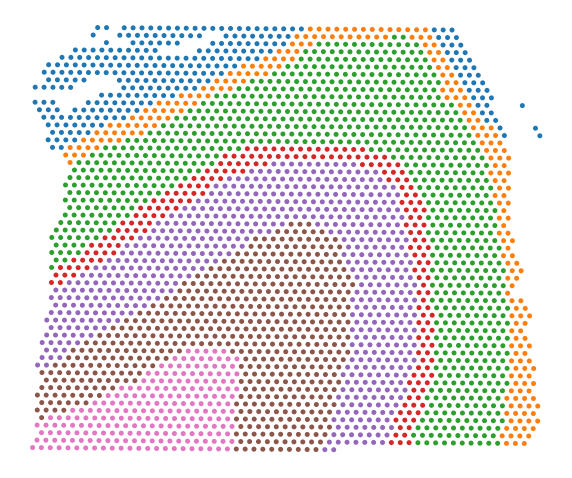

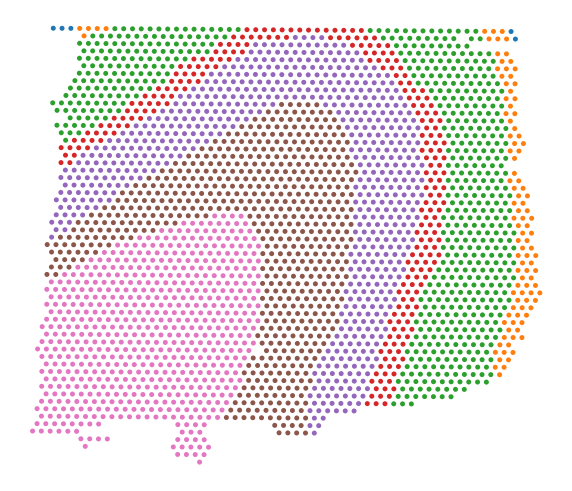

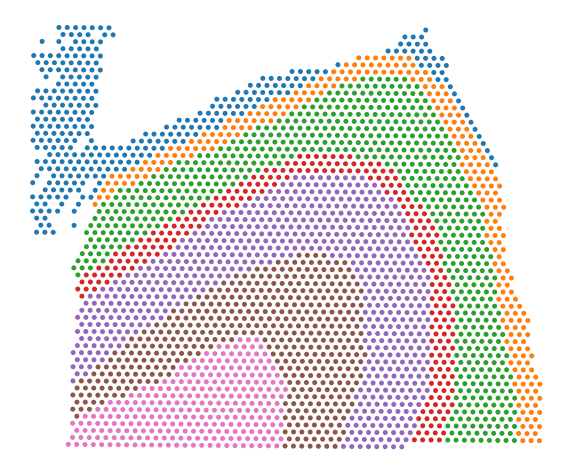

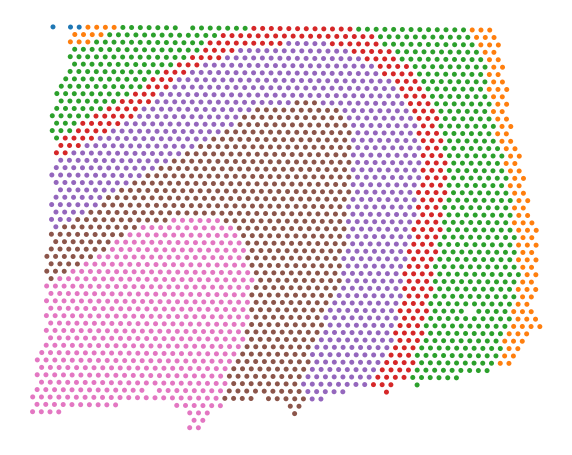

In [3]:
sliceA = sc.read_h5ad(sliceA_filename)
sliceB = sc.read_h5ad(sliceB_filename)
sliceC = sc.read_h5ad(sliceC_filename)
sliceD = sc.read_h5ad(sliceD_filename)

plot_slice(sliceA)
plot_slice(sliceB)
plot_slice(sliceC)
plot_slice(sliceD)

In [7]:
pi_AB = partial_pairwise_align(sliceA, sliceB, alpha=0.1, m=0.7, armijo=False, dissimilarity='glmpca', norm=True, verbose=True)
pi_BC = partial_pairwise_align(sliceB, sliceC, alpha=0.1, m=0.7, armijo=False, dissimilarity='glmpca', norm=True, verbose=True)
pi_CD = partial_pairwise_align(sliceC, sliceD, alpha=0.1, m=0.7, armijo=False, dissimilarity='glmpca', norm=True, verbose=True)

Starting GLM-PCA...
Iteration: 0 | deviance=1.3983E+7
Iteration: 1 | deviance=1.3980E+7
Iteration: 2 | deviance=1.2291E+7
Iteration: 3 | deviance=1.1955E+7
Iteration: 4 | deviance=1.1796E+7
Iteration: 5 | deviance=1.1720E+7
Iteration: 6 | deviance=1.1679E+7
Iteration: 7 | deviance=1.1653E+7
Iteration: 8 | deviance=1.1636E+7
Iteration: 9 | deviance=1.1623E+7
Iteration: 10 | deviance=1.1612E+7
Iteration: 11 | deviance=1.1604E+7
Iteration: 12 | deviance=1.1598E+7
Iteration: 13 | deviance=1.1592E+7
Iteration: 14 | deviance=1.1588E+7
Iteration: 15 | deviance=1.1584E+7
Iteration: 16 | deviance=1.1580E+7
Iteration: 17 | deviance=1.1577E+7
Iteration: 18 | deviance=1.1575E+7
Iteration: 19 | deviance=1.1573E+7
Iteration: 20 | deviance=1.1571E+7
Iteration: 21 | deviance=1.1569E+7
Iteration: 22 | deviance=1.1567E+7
Iteration: 23 | deviance=1.1566E+7
Iteration: 24 | deviance=1.1564E+7
Iteration: 25 | deviance=1.1563E+7
GLM-PCA finished with joint matrix shape (5749, 50)
It.  |Loss        |Relative 

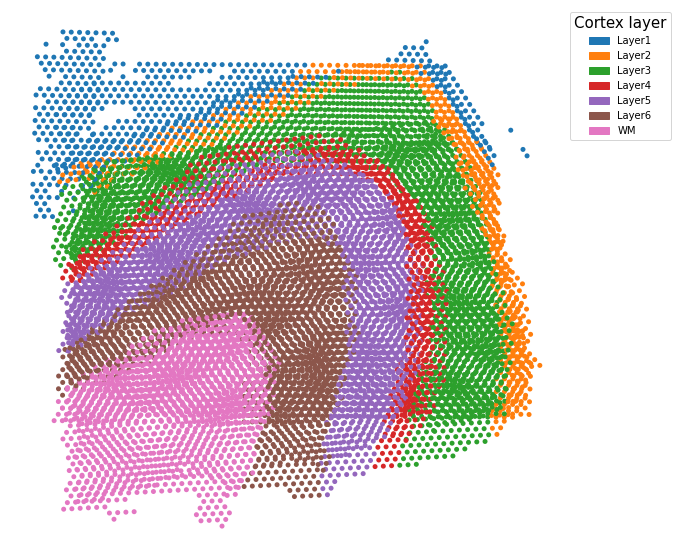

In [8]:
new_slices = partial_stack_slices_pairwise([sliceA, sliceB, sliceC, sliceD], [pi_AB, pi_BC, pi_CD])
plot_slices_overlap(new_slices)
plt.show()

In [11]:
pi_AB_full = pairwise_align(sliceA, sliceB, alpha=0.1, dissimilarity='kl', norm=True, verbose=True)
pi_BC_full = pairwise_align(sliceB, sliceC, alpha=0.1, dissimilarity='kl', norm=True, verbose=True)
pi_CD_full = pairwise_align(sliceC, sliceD, alpha=0.1, dissimilarity='kl', norm=True, verbose=True)

It.  |Loss        |Relative loss|Absolute loss
------------------------------------------------
    0|1.788082e+00|0.000000e+00|0.000000e+00
    1|1.618309e+00|1.049074e-01|1.697726e-01
    2|1.593728e+00|1.542370e-02|2.458117e-02
    3|1.587807e+00|3.728820e-03|5.920647e-03
    4|1.587447e+00|2.271580e-04|3.606011e-04
    5|1.587412e+00|2.158513e-05|3.426450e-05
    6|1.587396e+00|9.960427e-06|1.581115e-05
    7|1.587387e+00|6.142735e-06|9.750896e-06
    8|1.587383e+00|2.614638e-06|4.150430e-06
    9|1.587381e+00|1.078395e-06|1.711823e-06
   10|1.587380e+00|5.678106e-07|9.013311e-07
   11|1.587380e+00|2.499943e-07|3.968359e-07
   12|1.587379e+00|1.774084e-07|2.816144e-07
   13|1.587379e+00|1.235723e-07|1.961561e-07
   14|1.587379e+00|4.161562e-08|6.605976e-08
   15|1.587379e+00|1.716197e-08|2.724255e-08
   16|1.587379e+00|1.155779e-08|1.834660e-08
   17|1.587379e+00|3.704588e-09|5.880585e-09
   18|1.587379e+00|1.438734e-09|2.283816e-09
   19|1.587379e+00|1.088802e-09|1.728341e-09
It. 

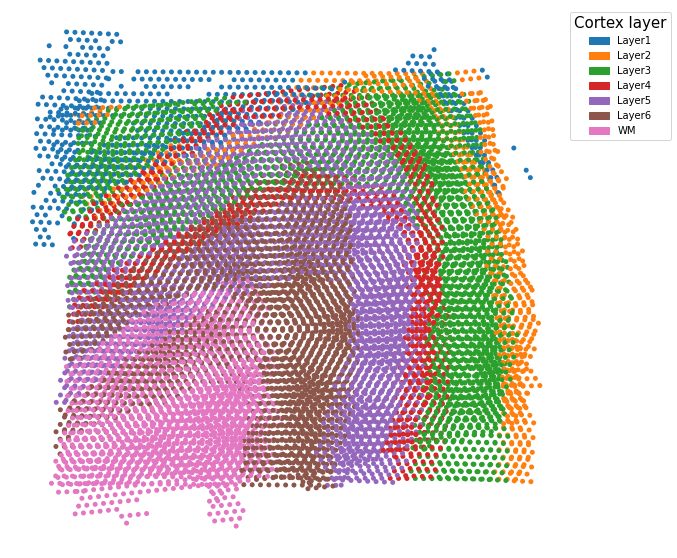

In [12]:
new_slices_full = stack_slices_pairwise([sliceA, sliceB, sliceC, sliceD], [pi_AB_full, pi_BC_full, pi_CD_full])
plot_slices_overlap(new_slices_full)
plt.show()

In [25]:
import plotly.express as px
import plotly.io as pio
import seaborn as sns
pio.renderers.default='notebook'
config = {
      'toImageButtonOptions': {
        'format': 'svg', # one of png, svg, jpeg, webp
        'filename': "DLPFC_3d"
      }
    }

In [43]:
layer_to_color_map = {'Layer{0}'.format(i+1):sns.color_palette()[i] for i in range(6)}
layer_to_color_map['WM'] = sns.color_palette()[6]
slices = [sliceA, sliceB, sliceC, sliceD]
z_coordinates = np.array([0,1,2,3])*1500
# z_difference = np.array([0,50,300,50])*10
# z_coordinates = [z_difference[:i+1].sum() for i in range(len(z_difference))]
df = pd.DataFrame(columns=['x','y','z','layer'])
for i, L in enumerate(new_slices):
    adata = slices[i]
    df_ = pd.DataFrame(np.concatenate((L.obsm['spatial'],np.matrix(z_coordinates[i]*np.ones(len(adata))).T,np.matrix(np.ones(len(adata),dtype=int)).T),axis=1),columns=['x','y','z','layer'])
    df_.loc[:,"layer"] = list(adata.obs['layer_guess_reordered'])
    df = df.append(df_, ignore_index=True)
df = df.sort_values(by=['layer'])
df['y'] = -df['y']
# df[['x','y','z']] = df[['x','y','z']]/factor
fig = px.scatter_3d(df, x='x', y='y', z='z',
                  color='layer',color_discrete_sequence=[matplotlib.colors.to_hex(layer_to_color_map[c]) for c in sorted(list(adata.obs['layer_guess_reordered'].cat.categories))])#adata.uns['layer_guess_reordered_colors'])
fig.update_layout(scene_aspectmode='data',font=dict(size=8))
fig.show(config=config)
    
    
    
    

/tmp/ipykernel_44918/277306996.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_44918/277306996.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_44918/277306996.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_44918/277306996.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

